## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mca_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mca_db

# Display the data table for preview
mca_db.head(20)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [113]:
len(mca_db["Mouse ID"])

1893

In [36]:
#Checking the number of mice
mouse_metadata_path=pd.read_csv('data/Mouse_metadata.csv')
study_results_path=pd.read_csv('data/Study_results.csv')
mca_db.head()

count_mouse_metadata_path = mouse_metadata_path['Mouse ID'].count()
count_mouse_metadata_path

249

In [111]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mca_db.duplicated(subset=["Mouse ID","Timepoint"]).any()
mca_db=mca_db.drop_duplicates(subset=["Mouse ID","Timepoint"])
len(mca_db["Mouse ID"])

1888

In [109]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_in_Mouse_ID=mca_db.duplicated(subset=['Mouse ID',"Timepoint"])
if duplicate_in_Mouse_ID.any():
    print(mca_db.loc[duplicate_in_Mouse_ID],end='\n\n')

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  



In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_metadata_path = pd.read_csv('data/Mouse_metadata.csv')
mouse_metadata_path = mouse_metadata_path.dropna()
mouse_metadata_path.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [60]:
# Checking the number of mice in the clean DataFrame.
len(mca_db["Mouse ID"])

249

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mca_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mca_db = mca_db.copy()
mca_db = mca_db.groupby(['Drug Regimen'])
gd = mca_db.mean()['Tumor Volume (mm3)']
ge = mca_db.median()['Tumor Volume (mm3)']
gf = mca_db.var()['Tumor Volume (mm3)']
gg = mca_db.sem()['Tumor Volume (mm3)']
gh = mca_db.std()['Tumor Volume (mm3)']
gx_db = pd.merge(gd, ge, how="left", on=["Drug Regimen"])
gy_db = pd.merge(gf, gg, how="left", on=["Drug Regimen"])
gz_db = pd.merge(gy_db,gh,how="left", on=["Drug Regimen"])
gxx = pd.merge(gx_db, gz_db, how="left", on=["Drug Regimen"])


gxx=gxx.rename(columns={"Tumor Volume (mm3)_x_x": "Mean Tumor Volume (mm3)",
                      "Tumor Volume (mm3)_y_x": "Median Tumor Volume (mm3)",
                        "Tumor Volume (mm3)_x_y": "Variance Tumor Volume (mm3)",
                        "Tumor Volume (mm3)_y_y": "SEM Tumor Volume (mm3)",
                        "Tumor Volume (mm3)": "Standard Deviation Tumor Volume (mm3)"
                      })
gxx.head(100)


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),SEM Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.322552,50.854632,42.351070,0.512884,6.507770
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line (after meeting)

mca_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mca_db.duplicated(subset=["Mouse ID","Timepoint"]).any()
mca_db=mca_db.drop_duplicates(subset=["Mouse ID","Timepoint"])

mca_db = mca_db.groupby(['Drug Regimen'])
mca_db.aggregate({'Tumor Volume (mm3)':['mean','median','var','sem','std']})



Tumor Volume (mm3)                                          
                           mean     median        var       sem       std
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  0.329346  4.994774
Ceftamin              52.591172  51.776157  39.290177  0.469821  6.268188
Infubinol             52.884795  51.820584  43.128684  0.492236  6.567243
Ketapril              55.235638  53.698743  68.553577  0.603860  8.279709
Naftisol              54.331565  52.509285  66.173479  0.596466  8.134708
Placebo               54.033581  52.288934  61.168083  0.581331  7.821003
Propriva              52.393463  50.909965  43.138803  0.525862  6.568014
Ramicane              40.216745  40.673236  23.486704  0.320955  4.846308
Stelasyn              54.233149  52.431737  59.450562  0.573111  7.710419
Zoniferol             53.236507  51.818479  48.533355  0.516398  6.966589

## Bar and Pie Charts

In [10]:
bar_title="Data Points Per Regimen"
x_label="Drug Regimen"
y_label="Data Points"

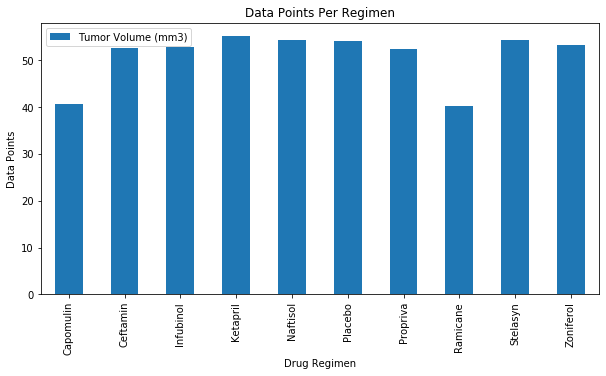

<Figure size 432x288 with 0 Axes>

In [68]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
gxx.groupby("Drug Regimen")
groupByData=gxx.groupby("Drug Regimen")
summary_gxx=mca_db.mean()['Tumor Volume (mm3)'].to_frame()
summary_gxx.head()
summary_gxx.plot(kind="bar", figsize=(10,5))
plt.title(bar_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()
plt.tight_layout()

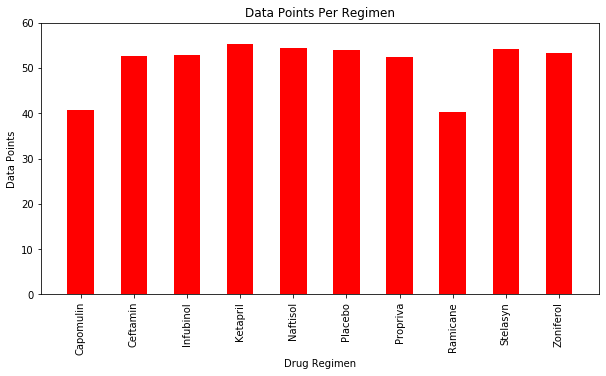

In [69]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(summary_gxx))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,5))
plt.bar(x_axis, summary_gxx["Tumor Volume (mm3)"], color = "r", width = .5)
plt.xticks(tick_locations, summary_gxx.index.values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-.25)

#plt.ylim(0, max(summary_gxx["Data Points"])+10)
plt.ylim(0, 60)

plt.title(bar_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

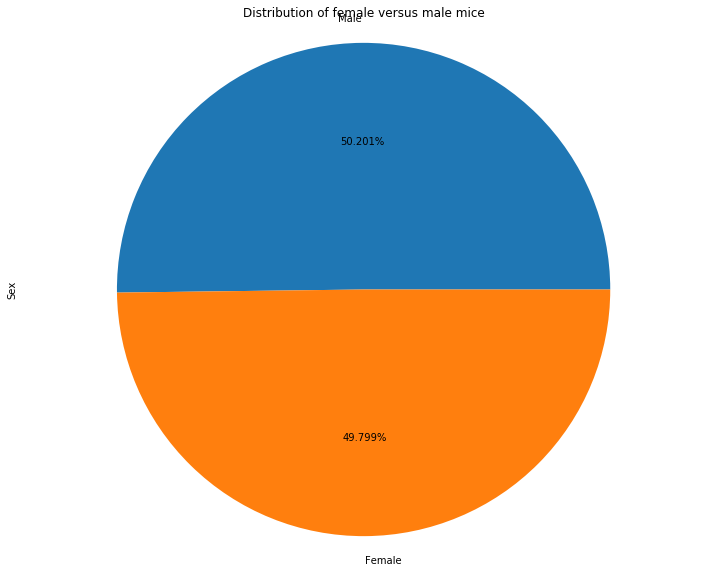

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

miceCount=mouse_metadata["Sex"].value_counts()
plt.figure(figsize=(10,8))
miceCount.plot(kind="pie",autopct='%1.3f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.show()

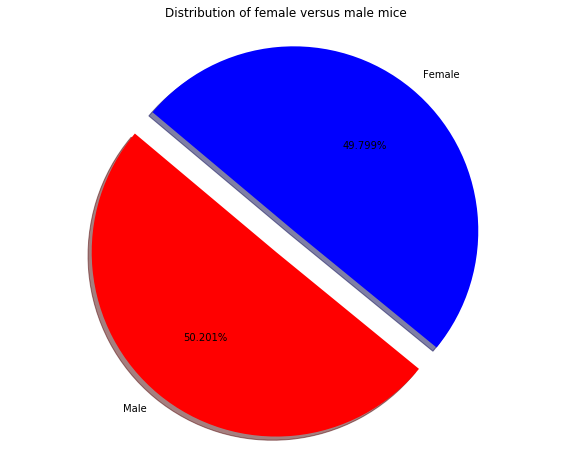

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
 
colors=["red","blue"]
explode=(0.05,0.1)
plt.figure(figsize=(10,8))
plt.pie(miceCount.values, explode=explode, labels=miceCount.index.values, colors=colors,
        autopct="%1.3f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mca_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mca_db.duplicated(subset=["Mouse ID","Timepoint"]).any()
mca_db=mca_db.drop_duplicates(subset=["Mouse ID","Timepoint"])
regimenData = mca_db[(mca_db["Drug Regimen"] == "Capomulin") | 
                          (mca_db["Drug Regimen"] == "Ramicane") | 
                          (mca_db["Drug Regimen"] == "Infubinol") | 
                          (mca_db["Drug Regimen"] == "Ceftamin")]
regimenData = regimenData[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimenData = regimenData.groupby(["Mouse ID", "Drug Regimen"])
regimenDF = regimenData["Tumor Volume (mm3)"].sum().to_frame()
regimenPlot = regimenDF["Tumor Volume (mm3)"]
regimenDF.head()

# quartile calculations
quartiles = regimenPlot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


In [114]:
#creating list of treatments
mca_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mca_db.duplicated(subset=["Mouse ID","Timepoint"]).any()
mca_db=mca_db.drop_duplicates(subset=["Mouse ID","Timepoint"])

#mca_db[["Drug Regimen","Tumor Volume (mm3)"]]
mca_db

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
mca_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mca_db.duplicated(subset=["Mouse ID","Timepoint"]).any()
mca_db=mca_db.drop_duplicates(subset=["Mouse ID","Timepoint"])
gd = mca_db.mean()['Tumor Volume (mm3)']

    
# Locate the rows which contain mice on each drug and get the tumor volumes
# quartile calculations
quartiles=mca_db["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles    
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq
    
print(f"The lower quartile of the tumor size is: {lowerq}")
print(f"The upper quartile of the tumor size is: {upperq}")
print(f"The interquartile of the tumor size is: {iqr}")
print(f"The median of the tumor size is: {quartiles[0.5]}")

    
# Determine outliers using upper and lower bounds
lower_bound=lowerq - (1.5*iqr)
upper_bound=upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of the tumor size is: 45.0
The upper quartile of the tumor size is: 56.32407510749999
The interquartile of the tumor size is: 11.324075107499993
The median of the tumor size is: 48.951421075
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


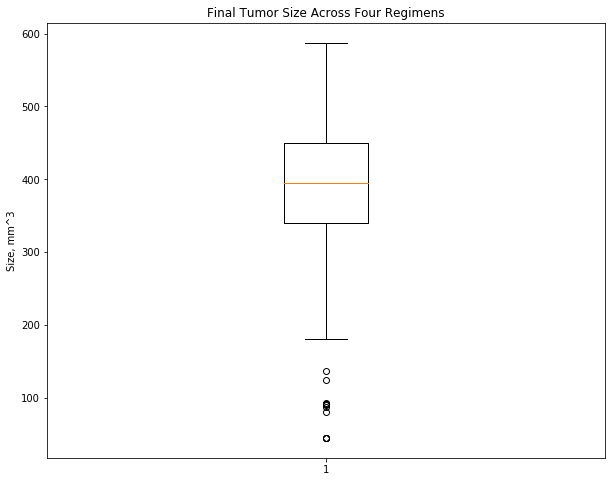

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1,ax1=plt.subplots(figsize=(10,8))
ax1.set_title('Final Tumor Size Across Four Regimens')
ax1.set_ylabel('Size, mm^3')
ax1.boxplot(regimenPlot)
plt.show()

## Line and Scatter Plots

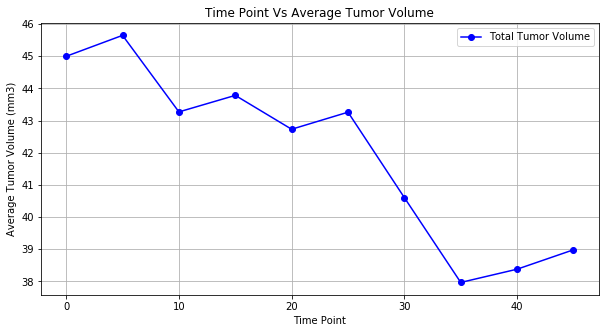

In [10]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

##
mca_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mca_db.duplicated(subset=["Mouse ID","Timepoint"]).any()
mca_db=mca_db.drop_duplicates(subset=["Mouse ID","Timepoint"])

tumorData = mca_db[(mca_db["Drug Regimen"] == "Capomulin") & (mca_db["Mouse ID"] == "b128")]
tumorData = tumorData.groupby(["Drug Regimen", "Timepoint"])
tumorDataDF = tumorData["Tumor Volume (mm3)"].mean().to_frame()
tumorIndexDataDF = tumorDataDF.unstack(0)
tumorPlotDF = tumorIndexDataDF["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure(figsize=(10,5))
tumorTotal, = plt.plot(xAxis, tumorPlotDF["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumorTotal], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
# plt.xlim(-10, 50)
# plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

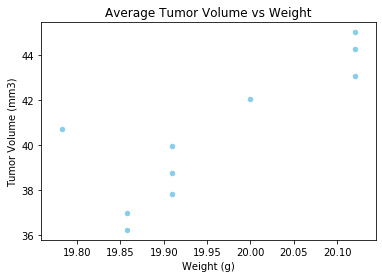

In [11]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mca_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mca_db.duplicated(subset=["Mouse ID","Timepoint"]).any()
mca_db=mca_db.drop_duplicates(subset=["Mouse ID","Timepoint"])

mca_db=mca_db.copy()
mca_db=mca_db.groupby(['Drug Regimen', 'Timepoint'])
gd=mca_db.mean()

capo=gd.loc['Capomulin',:]
capo.head()

ax1=capo.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)',
                     color='skyblue', title='Average Tumor Volume vs Weight')

plt.show()

## Correlation and Regression

The correlation between both factors is0.82
y = 20.29x = -364.52


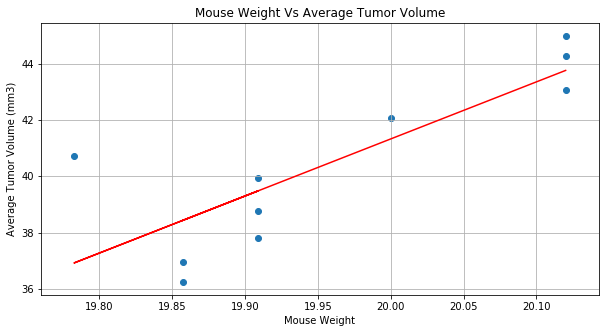

In [12]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mca_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mca_db.duplicated(subset=["Mouse ID","Timepoint"]).any()
mca_db=mca_db.drop_duplicates(subset=["Mouse ID","Timepoint"])

correlation=st.pearsonr(capo['Weight (g)'],capo['Tumor Volume (mm3)'])
print(f"The correlation between both factors is{round(correlation[0],2)}")

x_values=capo['Weight (g)']
y_values=capo['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))
print (line_eq)

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()